In [80]:
#import library 
import os 
import glob as glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
#get current directory /// read number file 
print(os.getcwd())
#read csv 
df = pd.read_csv('file1.csv', sep = ',')

D:\OneDrive - Data ScienceTech Institute\5 python Lab\Python Project


# Goal :
  + ## Understand our data as best as possible (a small step forward is better than a big step back)
  + ## Develop a first modeling 
  

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 19 columns):
 #   Column                                                                                           Non-Null Count  Dtype 
---  ------                                                                                           --------------  ----- 
 0   Please specify your campus                                                                       45 non-null     object
 1   Please specify your programme                                                                    45 non-null     object
 2   1 - Did the class meet your expectations?                                                        45 non-null     object
 3   Please share your comments                                                                       24 non-null     object
 4   2 - Was the professor's quality of expression good?                                              45 non-null     object
 5   Please share your

## dictionary for feature 

In [3]:
dict1={"Please specify your campus":"campus",
        "Please specify your programme":"programme",
        "1 - Did the class meet your expectations?":"expectation",
        "Please share your comments":"expectation_comment",
        "2 - Was the professor's quality of expression good?":"quality_expression",
        "Please share your comments.1":"expression_comment",
        "3 - Was the class content clearly expressed?":"class_content_expressed",
        "Please share your comments.2":"content_comment",
        "4 - Did the professor answer your questions clearly?":"answer_question",
        "Please share your comments.3":"aq_comment",
        "5 - What do you think of the class difficulty?":"difficulty",
        "Please share your comments.4":"difficulty_comment",
        "6 - What did you most appreciate about the professor's class?":"most_appreciate_comment",
        "7 - What did you least appreciate about the professor's class?":"least_appreciate_comment",
        "8 - What are the main take-aways (what did you learn)?":"main_learn_comment",
        "9 - Did the professor explain why the class is important for the DSTI programme?":"explain_why",
        "Please share your comments.5":"explain_comment",
        "10 -  Is there anything you would have liked to have seen during the class that wasn’t covered?" : "not_covered_comment",
        "11 -Thank you for your reply, if you have any other comment please state them below":"other_comment"
       }


In [88]:
#rename the column 
df = df.rename(columns = dict1)

In [84]:
#df.info()
df.head()

,campus,programme,expectation,expectation_comment,quality_expression,expression_comment,class_content_expressed,content_comment,answer_question,aq_comment,difficulty,difficulty_comment,most_appreciate_comment,least_appreciate_comment,main_learn_comment,explain_why,explain_comment,not_covered_comment,other_comment
0,Paris,Applied MSc in Data Science & AI,"No, it wasn't clear",NaN,"No, not at all","he was not coming prepared, yeah something i c...","No, it wasn't clear",NaN,"No, it wasn't clear",NaN,Average,since I had some little understanding of progr...,he is an expert programmer no talking about th...,unprepared...... you can imagine how just bein...,if you are an expert you can tackle any proble...,"Yes, absolutely",NaN,like I would really need a support session to ...,NaN
1,Off-campus,Applied MSc in Data Science & AI,"No, it wasn't clear",I am very sorry to say that because professor ...,"Yes, partially",Partially because as the course consists in ob...,"Yes, absolutely","But we haven't had time to finish course, and ...","Yes, absolutely",He answers all our question.,Hard,Hard only because of a lack of structure of ho...,Its patience. And also exercices performed dur...,The lack of course structure : it was an obser...,I need to think of my implementation structure...,"Yes, absolutely",Because C language is behind the Python scene.,What I would have liked is:\n- a course suppor...,I am very sorry for all those negatives commen...
2,Paris,Applied MSc in Data Science & AI,"No, it wasn't clear",Well. That’s not what I expected. It was not s...,"Yes, partially",French accent is quite strong but still unders...,"Yes, partially",I’m very convinced that Clement is an expert i...,"Yes, absolutely",Clement is very attentive to questions and al...,Hard,"Programming in C is not easy in general, but a...",I appreciated the fact we had time to do exerc...,There must be a social code even if we’re not ...,We learned basic programming in C and even saw...,"Yes, absolutely",Clement explained the connection between C and...,I would have liked to see general presentation...,I know that many students were not happy with ...
3,Paris,Applied MSc in Data Science & AI,"No, it wasn't clear",NaN,"Yes, partially",NaN,"Yes, partially",NaN,"Yes, partially",NaN,Very hard,NaN,He is nice,He is not well prepared,I learnt very few things,"Yes, partially",NaN,I hope he will prepare slides/notes before cla...,NaN
4,Sophia,Applied MSc in Data Science & AI,"No, it wasn't clear",Content were not in depth. I understand hands-...,"No, it wasn't clear",NaN,"No, it wasn't clear",NaN,"Yes, partially",NaN,Average,NaN,all the programs he taken,he was unable to express clearly what he is tr...,nothing,"Yes, partially",NaN,Object oriented concepts were not touched whil...,"Its better when professors are in class room, ..."



# Annotation 
- campus :                 Paris, Off-campus, Sophia
- programme:               DA DE DS 
- expectation:             No, not at all ; No, it wasn't clear ; Yes, partially ; Yes, absolutely
- quality_expression:      No, not at all ; No, it wasn't clear ; Yes, partially ; Yes, absolutely
- content:                 No, not at all ; No, it wasn't clear ; Yes, partially ; Yes, absolutely
- answer_question:         No, not at all ; No, it wasn't clear ; Yes, partially ; Yes, absolutely
- difficulty:              Easy ; Average ; Hard ; Very hard 
- explain why:             No, not at all ; No, it wasn't clear ; Yes, partially ; Yes, absolutely

# Comment 

- expectation_comment         
- expression_comment   
- content_comment       
- aq_comment            
- difficulty_comment    
- most_appreciate_comment       
- least_appreciate_comment     
- explain_comment     
- explain_why_comment           
- not_covered_comment          
- other_comment       






## pie plot
- extract comment for each part and summerize it

<AxesSubplot:>

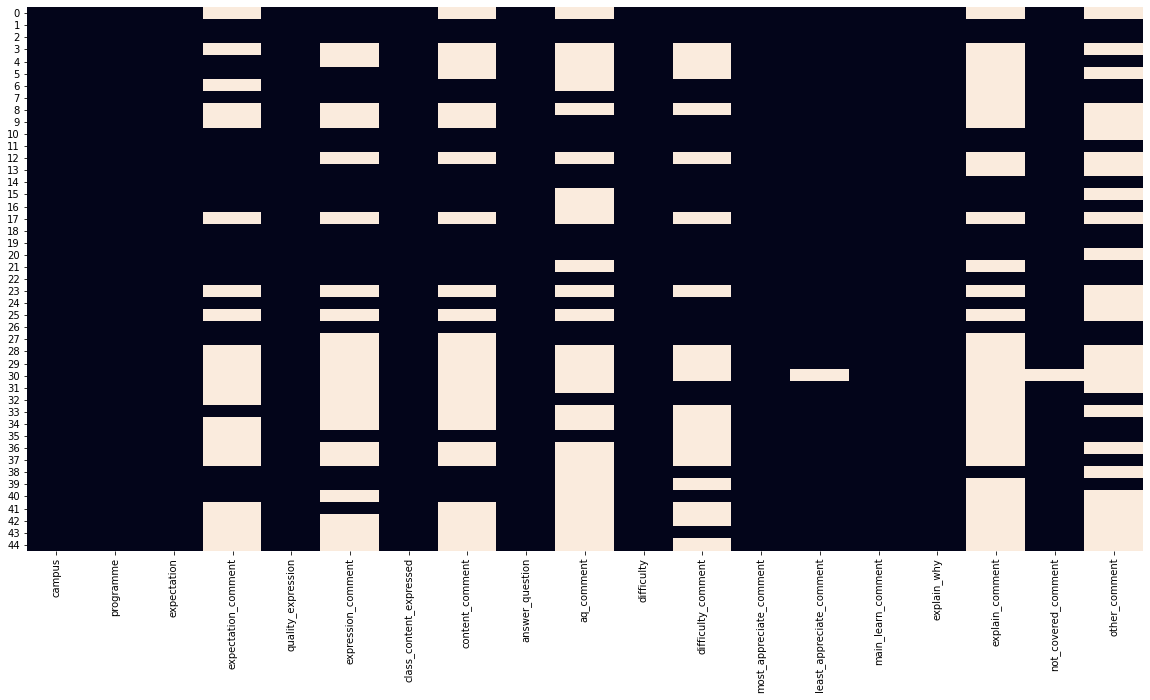

In [89]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)


In [90]:
#sort missing value 
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

campus                      0.000000
programme                   0.000000
expectation                 0.000000
quality_expression          0.000000
class_content_expressed     0.000000
answer_question             0.000000
difficulty                  0.000000
most_appreciate_comment     0.000000
main_learn_comment          0.000000
explain_why                 0.000000
not_covered_comment         0.022222
least_appreciate_comment    0.022222
difficulty_comment          0.422222
expectation_comment         0.466667
expression_comment          0.488889
content_comment             0.533333
other_comment               0.577778
aq_comment                  0.622222
explain_comment             0.688889
dtype: float64

In [92]:
#remove duplicate
df = df.drop_duplicates(subset=None, keep='first', inplace=False)

 # data extraction 

In [21]:
#column index
#{df.columns.get_loc(c): c for idx, c in enumerate(df.columns)}

In [22]:
#df_rating = df.loc[:, ['campus', 'programme', 'expectation','quality_expression','class_content_expressed','answer_question','difficulty','explain_why']]
#df_rating.head()

In [90]:
#replace value : missing DA student 
#df["programme"]=df["programme"].replace({"Applied MSc in Data Science & AI":"DS"})
#df["programme"]=df["programme"].replace({"Applied MSc in Data Engineering for AI":"DE"})


In [23]:
#listb=[2,1,4,3]
#lista = []
#for i in df['expectation'].unique():
#    lista.append(i)

#print(lista, listb)

In [92]:
#df_rating['expectation'] = df_rating['expectation'].replace(lista,listb)
#df_rating['quality_expression'] = df_rating['quality_expression'].replace(lista,listb)
#df_rating['quality_expression'] = df_rating['quality_expression'].replace(lista,listb)
#df_rating['class_content_expressed'] = df_rating['class_content_expressed'].replace(lista,listb)
#df_rating['answer_question'] = df_rating['answer_question'].replace(lista,listb)
#df_rating['explain_why'] = df_rating['explain_why'].replace(lista,listb)"""


In [50]:
#listd = [2,3,4,1]
#listc =[]
#for i in df['difficulty'].unique():
#    listc.append(i)
#print(listd,listc)


In [94]:
#df_rating['difficulty'] = df_rating['difficulty'].replace(listc,listd)

In [93]:
# Participant counts 
df["programme"].value_counts()

Applied MSc in Data Science & AI          40
Applied MSc in Data Engineering for AI     4
Name: programme, dtype: int64

In [24]:
#general overview
#df_rating.mean()

In [25]:
#mean rating DE cant not say anything because there are only 4 DE participant for this class  
#print(df_rating.loc[df_rating.programme == ("DE")].mean())

In [26]:
#print(df_rating.loc[df_rating.programme == ("DS")].mean())

# Pie plot 
need to write a function for all 

<AxesSubplot:ylabel='expectation'>

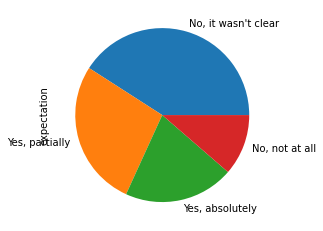

In [94]:
df["expectation"].value_counts().plot.pie()

In [95]:
df.head()

,campus,programme,expectation,expectation_comment,quality_expression,expression_comment,class_content_expressed,content_comment,answer_question,aq_comment,difficulty,difficulty_comment,most_appreciate_comment,least_appreciate_comment,main_learn_comment,explain_why,explain_comment,not_covered_comment,other_comment
0,Paris,Applied MSc in Data Science & AI,"No, it wasn't clear",NaN,"No, not at all","he was not coming prepared, yeah something i c...","No, it wasn't clear",NaN,"No, it wasn't clear",NaN,Average,since I had some little understanding of progr...,he is an expert programmer no talking about th...,unprepared...... you can imagine how just bein...,if you are an expert you can tackle any proble...,"Yes, absolutely",NaN,like I would really need a support session to ...,NaN
1,Off-campus,Applied MSc in Data Science & AI,"No, it wasn't clear",I am very sorry to say that because professor ...,"Yes, partially",Partially because as the course consists in ob...,"Yes, absolutely","But we haven't had time to finish course, and ...","Yes, absolutely",He answers all our question.,Hard,Hard only because of a lack of structure of ho...,Its patience. And also exercices performed dur...,The lack of course structure : it was an obser...,I need to think of my implementation structure...,"Yes, absolutely",Because C language is behind the Python scene.,What I would have liked is:\n- a course suppor...,I am very sorry for all those negatives commen...
2,Paris,Applied MSc in Data Science & AI,"No, it wasn't clear",Well. That’s not what I expected. It was not s...,"Yes, partially",French accent is quite strong but still unders...,"Yes, partially",I’m very convinced that Clement is an expert i...,"Yes, absolutely",Clement is very attentive to questions and al...,Hard,"Programming in C is not easy in general, but a...",I appreciated the fact we had time to do exerc...,There must be a social code even if we’re not ...,We learned basic programming in C and even saw...,"Yes, absolutely",Clement explained the connection between C and...,I would have liked to see general presentation...,I know that many students were not happy with ...
3,Paris,Applied MSc in Data Science & AI,"No, it wasn't clear",NaN,"Yes, partially",NaN,"Yes, partially",NaN,"Yes, partially",NaN,Very hard,NaN,He is nice,He is not well prepared,I learnt very few things,"Yes, partially",NaN,I hope he will prepare slides/notes before cla...,NaN
4,Sophia,Applied MSc in Data Science & AI,"No, it wasn't clear",Content were not in depth. I understand hands-...,"No, it wasn't clear",NaN,"No, it wasn't clear",NaN,"Yes, partially",NaN,Average,NaN,all the programs he taken,he was unable to express clearly what he is tr...,nothing,"Yes, partially",NaN,Object oriented concepts were not touched whil...,"Its better when professors are in class room, ..."


In [10]:
df['expectation_comment'][10]

'I already had an understanding of most of the concepts covered which helped a lot, I think without this I would have struggled as the class lacked structure and was at times confusing. '

In [96]:
expectation = [x for x in df['expectation_comment'] if str(x) != 'nan']

In [97]:
with open("raw_data\expectation.txt", "w") as outfile:
    outfile.write("\n".join(str(item) for item in expectation))

,campus,programme,expectation,expectation_comment,quality_expression,expression_comment,class_content_expressed,content_comment,answer_question,aq_comment,difficulty,difficulty_comment,most_appreciate_comment,least_appreciate_comment,main_learn_comment,explain_why,explain_comment,not_covered_comment,other_comment
0,Paris,Applied MSc in Data Science & AI,"No, it wasn't clear",NaN,"No, not at all","he was not coming prepared, yeah something i c...","No, it wasn't clear",NaN,"No, it wasn't clear",NaN,Average,since I had some little understanding of progr...,he is an expert programmer no talking about th...,unprepared...... you can imagine how just bein...,if you are an expert you can tackle any proble...,"Yes, absolutely",NaN,like I would really need a support session to ...,NaN
1,Off-campus,Applied MSc in Data Science & AI,"No, it wasn't clear",I am very sorry to say that because professor ...,"Yes, partially",Partially because as the course consists in ob...,"Yes, absolutely","But we haven't had time to finish course, and ...","Yes, absolutely",He answers all our question.,Hard,Hard only because of a lack of structure of ho...,Its patience. And also exercices performed dur...,The lack of course structure : it was an obser...,I need to think of my implementation structure...,"Yes, absolutely",Because C language is behind the Python scene.,What I would have liked is:\n- a course suppor...,I am very sorry for all those negatives commen...
2,Paris,Applied MSc in Data Science & AI,"No, it wasn't clear",Well. That’s not what I expected. It was not s...,"Yes, partially",French accent is quite strong but still unders...,"Yes, partially",I’m very convinced that Clement is an expert i...,"Yes, absolutely",Clement is very attentive to questions and al...,Hard,"Programming in C is not easy in general, but a...",I appreciated the fact we had time to do exerc...,There must be a social code even if we’re not ...,We learned basic programming in C and even saw...,"Yes, absolutely",Clement explained the connection between C and...,I would have liked to see general presentation...,I know that many students were not happy with ...
3,Paris,Applied MSc in Data Science & AI,"No, it wasn't clear",NaN,"Yes, partially",NaN,"Yes, partially",NaN,"Yes, partially",NaN,Very hard,NaN,He is nice,He is not well prepared,I learnt very few things,"Yes, partially",NaN,I hope he will prepare slides/notes before cla...,NaN
4,Sophia,Applied MSc in Data Science & AI,"No, it wasn't clear",Content were not in depth. I understand hands-...,"No, it wasn't clear",NaN,"No, it wasn't clear",NaN,"Yes, partially",NaN,Average,NaN,all the programs he taken,he was unable to express clearly what he is tr...,nothing,"Yes, partially",NaN,Object oriented concepts were not touched whil...,"Its better when professors are in class room, ..."
5,Off-campus,Applied MSc in Data Science & AI,"No, it wasn't clear","The name of the class is ""Software Engineering...","No, it wasn't clear",Expression in English sometimes hard to follow.,"Yes, partially",NaN,"Yes, partially",NaN,Average,NaN,I enjoyed learning about the different sorting...,"I found the class very ""low level"": we went st...",That I need to work more on pointers and C++.,"Yes, partially",NaN,"More high level actual ""software engineering"" ...",NaN
6,Paris,Applied MSc in Data Science & AI,"No, it wasn't clear",NaN,"No, it wasn't clear",It was not clear because Clément talks with a ...,"Yes, partially",He did not talk about uses of C and C++ in tod...,"Yes, partially",NaN,Average,"I have average skills in C so it was OK, but I...",the subject is interesting,"many things: \n- as I said, professor's skills...","The use of visual-studio, reminders from C and...","No, it wasn't clear",NaN,"examples of C and C++ projects, also implement...","I am sure that Clément is a good programmer, h..."
7,Sophia,Applied MSc in Data Science & AI,"No, it wasn't clear",For me I think the course can be better prepar...,"Yes, partially","Compared to t

<AxesSubplot:ylabel='quality_expression'>

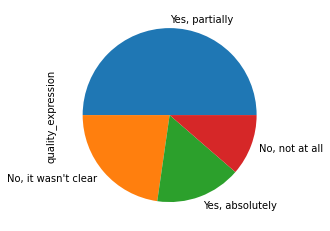

In [98]:
df["quality_expression"].value_counts().plot.pie()

In [99]:
appreciate = [x for x in df['most_appreciate_comment'] if str(x) != 'nan']
main_learn = [x for x in df['main_learn_comment'] if str(x) != 'nan']
least_appreciate = [x for x in df['least_appreciate_comment'] if str(x) != 'nan']
other_comment = [x for x in df['other_comment'] if str(x) != 'nan']

In [100]:
with open("raw_data\appreciate.txt", "w") as outfile:
    outfile.write("\n".join(str(item) for item in appreciate))

OSError: [Errno 22] Invalid argument: 'raw_data\x07ppreciate.txt'

In [101]:
with open("raw_data\main_learn.txt", "w") as outfile:
    outfile.write("\n".join(str(item) for item in main_learn))

In [102]:
with open("raw_data\least_appreciate.txt", "w") as outfile:
    outfile.write("\n".join(str(item) for item in least_appreciate))

In [103]:
with open("other_comment.txt", "w") as outfile:
    outfile.write("\n".join(str(item) for item in df["other_comment"]))

In [142]:
f = open("raw_data\expectation.txt", 'r')

In [143]:
content = f.read()


print(content)

I am very sorry to say that because professor is very patient and expert. But the course is a real mess in which I had great difficulties to understand what are the things to learn. 
Well. That’s not what I expected. It was not structured enough, I missed theory and general organization of classes.
Content were not in depth. I understand hands-on sessions but concept should be explained before on board properly. Unfortunately it wasn't done for most of the concepts.
The name of the class is "Software Engineering" so I expected a more general class (i.e. higher level software engineering rather than 90% coding).
For me I think the course can be better prepared: sometimes it is really difficult to follow as the professor wrote the codes on his side and explained quite fast later. It would be
For the exercises, I think he could prepare the solutions in advance before the class instead of trying out the codes in class.
I already had an understanding of most of the concepts covered which he

In [106]:
# Load Pkgs
import spacy
# Text Preprocessing Pkg
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
# Build a List of Stopwords
stopwords = list(STOP_WORDS)

In [107]:
nlp = spacy.load('en_core_web_sm')

In [144]:
# Build an NLP Object
docx = nlp(content)

In [145]:
# Build Word Frequency
# word.text is tokenization in spacy
word_frequencies = {}
for word in docx:
    if word.text not in stopwords:
            if word.text not in word_frequencies.keys():
                word_frequencies[word.text] = 1
            else:
                word_frequencies[word.text] += 1

In [146]:
word_frequencies

{'I': 14,
 'sorry': 1,
 'professor': 3,
 'patient': 1,
 'expert': 1,
 '.': 40,
 'But': 1,
 'course': 5,
 'real': 1,
 'mess': 1,
 'great': 1,
 'difficulties': 1,
 'understand': 2,
 'things': 2,
 'learn': 3,
 '\n': 22,
 'Well': 1,
 'That': 1,
 'expected': 2,
 'It': 6,
 'structured': 1,
 ',': 23,
 'missed': 1,
 'theory': 1,
 'general': 3,
 'organization': 1,
 'classes': 1,
 'Content': 1,
 'depth': 1,
 'hands': 1,
 '-': 1,
 'sessions': 1,
 'concept': 1,
 'explained': 2,
 'board': 1,
 'properly': 2,
 'Unfortunately': 1,
 'concepts': 4,
 'The': 8,
 'class': 11,
 '"': 6,
 'Software': 2,
 'Engineering': 2,
 '(': 2,
 'i.e.': 1,
 'higher': 1,
 'level': 1,
 'software': 3,
 'engineering': 2,
 '90': 1,
 '%': 1,
 'coding': 3,
 ')': 3,
 'For': 2,
 'think': 4,
 'better': 2,
 'prepared': 2,
 ':': 1,
 'difficult': 2,
 'follow': 4,
 'wrote': 1,
 'codes': 2,
 'fast': 1,
 'later': 1,
 'exercises': 2,
 'prepare': 2,
 'solutions': 3,
 'advance': 1,
 'instead': 1,
 'trying': 1,
 'understanding': 1,
 'covered'

In [147]:
# Maximum Word Frequency
maximum_frequency = max(word_frequencies.values())

In [148]:
#Normalize word_frequencies 

for word in word_frequencies.keys():  
        word_frequencies[word] = (word_frequencies[word]/maximum_frequency)

In [149]:
# Frequency Table
word_frequencies

{'I': 0.35,
 'sorry': 0.025,
 'professor': 0.075,
 'patient': 0.025,
 'expert': 0.025,
 '.': 1.0,
 'But': 0.025,
 'course': 0.125,
 'real': 0.025,
 'mess': 0.025,
 'great': 0.025,
 'difficulties': 0.025,
 'understand': 0.05,
 'things': 0.05,
 'learn': 0.075,
 '\n': 0.55,
 'Well': 0.025,
 'That': 0.025,
 'expected': 0.05,
 'It': 0.15,
 'structured': 0.025,
 ',': 0.575,
 'missed': 0.025,
 'theory': 0.025,
 'general': 0.075,
 'organization': 0.025,
 'classes': 0.025,
 'Content': 0.025,
 'depth': 0.025,
 'hands': 0.025,
 '-': 0.025,
 'sessions': 0.025,
 'concept': 0.025,
 'explained': 0.05,
 'board': 0.025,
 'properly': 0.05,
 'Unfortunately': 0.025,
 'concepts': 0.1,
 'The': 0.2,
 'class': 0.275,
 '"': 0.15,
 'Software': 0.05,
 'Engineering': 0.05,
 '(': 0.05,
 'i.e.': 0.025,
 'higher': 0.025,
 'level': 0.025,
 'software': 0.075,
 'engineering': 0.05,
 '90': 0.025,
 '%': 0.025,
 'coding': 0.075,
 ')': 0.075,
 'For': 0.05,
 'think': 0.1,
 'better': 0.05,
 'prepared': 0.05,
 ':': 0.025,
 'd

In [150]:
# Sentence Tokens
sentence_list = [ sentence for sentence in docx.sents ]

In [151]:
# Sentence Score via comparrng each word with sentence
sentence_scores = {}  
for sent in sentence_list:  
        for word in sent:
            if word.text.lower() in word_frequencies.keys():
                if len(sent.text.split(' ')) < 30:
                    if sent not in sentence_scores.keys():
                        sentence_scores[sent] = word_frequencies[word.text.lower()]
                    else:
                        sentence_scores[sent] += word_frequencies[word.text.lower()]

In [152]:
# Sentence Score Table
sentence_scores

{I am very sorry to say that because professor is very patient and expert.: 1.15,
 But the course is a real mess in which I had great difficulties to understand what are the things to learn.: 1.4,
 : 0.55,
 Well.: 1.0,
 That’s not what I expected.: 1.05,
 It was not structured enough, I missed theory and general organization of classes.: 1.775,
 : 0.55,
 Content were not in depth.: 1.025,
 I understand hands-on sessions but concept should be explained before on board properly.: 1.275,
 Unfortunately it wasn't done for most of the concepts.: 1.125,
 : 0.55,
 The name of the class is "Software Engineering" so I expected a more general class (i.e. higher level software engineering rather than 90% coding).: 2.55,
 : 0.55,
 It would be: 0.55,
 For the exercises, I think he could prepare the solutions in advance before the class instead of trying out the codes in class.: 2.525,
 : 0.55,
 : 0.55,
 In general, the module seemed unstructured and unclear, as well as inefficiently planned.: 2.349

In [153]:
#FINDING TOP N SENTENCE WITH LARGEST SCORE
#using heapq
# Import Heapq 
from heapq import nlargest

In [154]:
summarized_sentences = nlargest(5, sentence_scores, key=sentence_scores.get)

In [155]:
summarized_sentences

[Clement came teaching without any slides, preparation, instruction, guideline beforehand that make the course become extremely messy and difficult to follow. 
 ,
 I ,as a beginner of C Programming, spend quite a time just to build an environment for writing a code and make my console functional.,
 The name of the class is "Software Engineering" so I expected a more general class (i.e. higher level software engineering rather than 90% coding).,
 For the exercises, I think he could prepare the solutions in advance before the class instead of trying out the codes in class.,
 Or, at least, doing more theoretical explanation of commands on slides prior to exercice ourselves on software.]

In [156]:
# Convert Sentences from Spacy Span to Strings for joining entire sentence
for w in summarized_sentences:
    print(w.text)

Clement came teaching without any slides, preparation, instruction, guideline beforehand that make the course become extremely messy and difficult to follow. 


I ,as a beginner of C Programming, spend quite a time just to build an environment for writing a code and make my console functional.
The name of the class is "Software Engineering" so I expected a more general class (i.e. higher level software engineering rather than 90% coding).
For the exercises, I think he could prepare the solutions in advance before the class instead of trying out the codes in class.
Or, at least, doing more theoretical explanation of commands on slides prior to exercice ourselves on software.


In [157]:
# List Comprehension of Sentences Converted From Spacy.span to strings
final_sentences = [ w.text for w in summarized_sentences ]

In [158]:
summary = ' '.join(final_sentences)

summary.replace("\n" ," ")

'Clement came teaching without any slides, preparation, instruction, guideline beforehand that make the course become extremely messy and difficult to follow.    I ,as a beginner of C Programming, spend quite a time just to build an environment for writing a code and make my console functional. The name of the class is "Software Engineering" so I expected a more general class (i.e. higher level software engineering rather than 90% coding). For the exercises, I think he could prepare the solutions in advance before the class instead of trying out the codes in class. Or, at least, doing more theoretical explanation of commands on slides prior to exercice ourselves on software.'

In [160]:
# Length of Summary
print(len(content),len(summary))

4352 682
